# Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate as cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
nba = pd.read_csv('D:/Studies/Data Science/nba_2013.csv')

# DataSet

In [2]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.shape

(481, 31)

In [4]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

# Handling null values

In [5]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

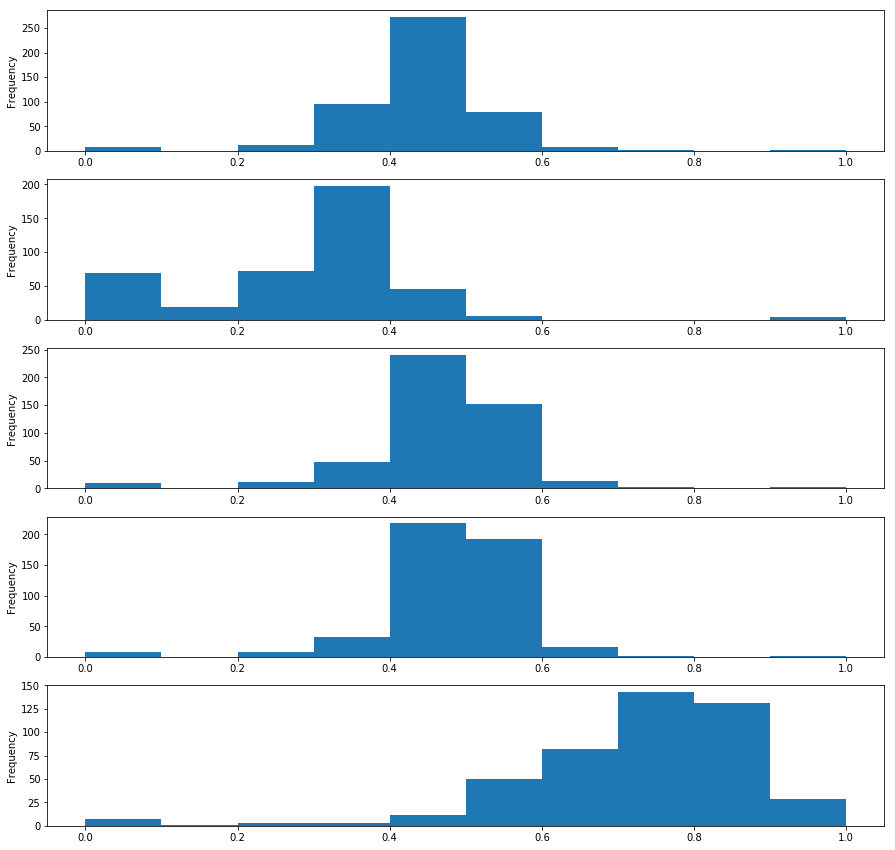

In [6]:
i=1
nullcol=['fg.','x3p.','x2p.','efg.','ft.']
for val in nullcol:
    plt.subplot(5,1,i)
    nba[val].plot(kind='hist',figsize=(15,15))
    plt.show
    i=i+1

In [7]:
for val in nullcol:
    nba[val].fillna(nba[val].median(),inplace=True)


In [8]:
nba.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

# Data Visualization

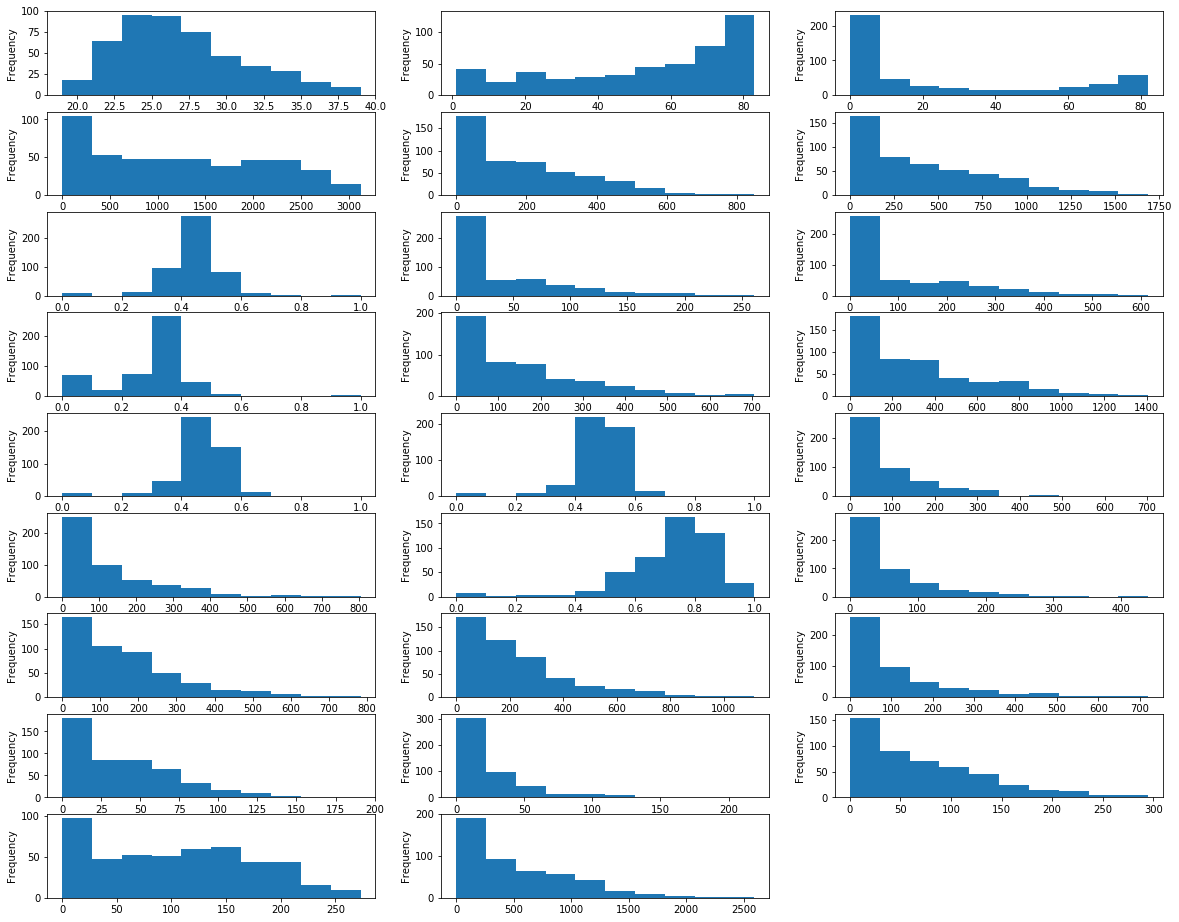

In [9]:
col=['age', 'g', 'gs', 'mp', 'fg', 'fga',
     'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']
i=1
for val in col: 
    plt.subplot(11,3,i)
    nba[val].plot(kind='hist',figsize=(20,20))
    i=i+1

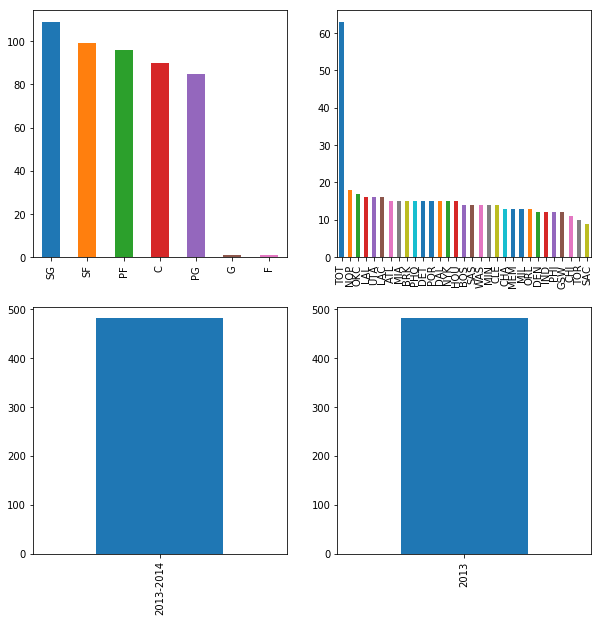

In [10]:
i=1
col=['pos','bref_team_id','season','season_end']
for val in col:
    plt.subplot(2,2,i)
    nba[val].value_counts().plot(kind='bar',figsize=(10,10))
    plt.show
    i=i+1

# One hot encoding

In [11]:
col=['pos','bref_team_id']
for val in col:
    dum=pd.get_dummies(nba[val],drop_first=True,prefix=val)
    nba=nba.join(dum)
    nba.drop(val,axis=1,inplace=True)

# Dropping Unwanted Columns

In [12]:
col=['player','season','season_end']
for val in col:
    nba.drop(val,axis=1,inplace=True)

In [13]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,bref_team_id_ORL,bref_team_id_PHI,bref_team_id_PHO,bref_team_id_POR,bref_team_id_SAC,bref_team_id_SAS,bref_team_id_TOR,bref_team_id_TOT,bref_team_id_UTA,bref_team_id_WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


# Correlation

In [14]:
x=nba.drop('pts',axis=1)
y=nba['pts']

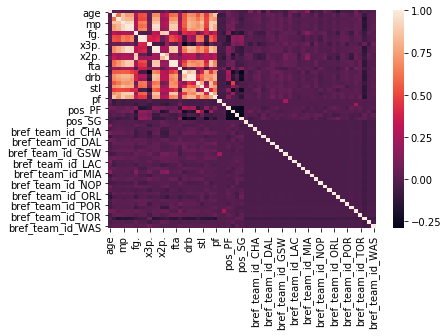

In [15]:
sb.heatmap(x.corr())

In [16]:
cor=x.corr()
cor

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,bref_team_id_ORL,bref_team_id_PHI,bref_team_id_PHO,bref_team_id_POR,bref_team_id_SAC,bref_team_id_SAS,bref_team_id_TOR,bref_team_id_TOT,bref_team_id_UTA,bref_team_id_WAS
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025226,0.050611,0.028850,0.013248,...,-0.056925,-0.133849,-0.027494,-0.047458,-0.053355,0.079234,-0.045491,-0.008947,-0.028057,-0.012182
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.319403,0.518074,0.537011,0.057541,...,0.040394,-0.037436,0.027044,0.019478,-0.017761,0.076977,0.027340,-0.095000,-0.003235,0.013420
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234255,0.501808,0.515718,0.038062,...,0.012362,-0.014334,0.010668,0.010668,0.013389,0.019200,0.061123,-0.169933,0.000334,0.021287
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.272523,0.645056,0.666126,0.093103,...,0.032282,-0.020458,0.015922,0.017270,0.002234,0.025700,0.036839,-0.146317,-0.000843,0.022554
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.277199,0.597239,0.613988,0.073361,...,0.019161,-0.015964,0.019425,0.021864,0.011983,0.039674,0.030150,-0.150510,-0.009530,0.026489
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.210511,0.662004,0.685535,0.108166,...,0.024077,-0.006315,0.015518,0.024899,0.014067,0.024049,0.029871,-0.134549,-0.004764,0.024385
fg.,0.025226,0.319403,0.234255,0.272523,0.277199,0.210511,1.000000,-0.025529,-0.041715,-0.011844,...,-0.014305,-0.084604,0.037009,-0.016372,-0.073465,0.056931,0.002455,-0.089705,0.033581,0.006764
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025529,1.000000,0.991700,0.402876,...,0.011111,-0.015575,0.040213,0.041390,-0.021600,0.029557,0.028070,-0.066185,-0.020952,0.020063
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041715,0.991700,1.000000,0.385441,...,0.014627,0.007381,0.036351,0.037794,-0.017028,0.014191,0.026116,-0.068505,-0.016531,0.012512
x3p.,0.013248,0.057541,0.038062,0.093103,0.073361,0.108166,-0.011844,0.402876,0.385441,1.000000,...,0.019231,-0.035607,0.026266,-0.061503,0.009657,0.008236,-0.055760,0.058137,-0.064412,0.068547


In [17]:
 cor.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG', 'bref_team_id_BOS', 'bref_team_id_BRK',
       'bref_team_id_CHA', 'bref_team_id_CHI', 'bref_team_id_CLE',
       'bref_team_id_DAL', 'bref_team_id_DEN', 'bref_team_id_DET',
       'bref_team_id_GSW', 'bref_team_id_HOU', 'bref_team_id_IND',
       'bref_team_id_LAC', 'bref_team_id_LAL', 'bref_team_id_MEM',
       'bref_team_id_MIA', 'bref_team_id_MIL', 'bref_team_id_MIN',
       'bref_team_id_NOP', 'bref_team_id_NYK', 'bref_team_id_OKC',
       'bref_team_id_ORL', 'bref_team_id_PHI', 'bref_team_id_PHO',
       'bref_team_id_POR', 'bref_team_id_SAC', 'bref_team_id_SAS',
       'bref_team_id_TOR', 'bref_team_id_TOT', 'bref_team_id_UTA',
       'bref_team_id_WAS'],
      dtype='object')

In [18]:
i=0
for val in cor.columns:
    for x1 in cor.columns:
        if((cor[val].loc[x1]>0.9)&(cor[val].loc[x1]<=0.9999999999)):
            print(val,'and',x1,'has correlation')
            i=1
if(i==0):
    print('There is no correlation greater than 0.9')

mp and fg has correlation
mp and fga has correlation
fg and mp has correlation
fg and fga has correlation
fg and x2p has correlation
fg and x2pa has correlation
fg and tov has correlation
fga and mp has correlation
fga and fg has correlation
fga and x2p has correlation
fga and x2pa has correlation
fga and tov has correlation
fg. and efg. has correlation
x3p and x3pa has correlation
x3pa and x3p has correlation
x2p and fg has correlation
x2p and fga has correlation
x2p and x2pa has correlation
x2pa and fg has correlation
x2pa and fga has correlation
x2pa and x2p has correlation
efg. and fg. has correlation
ft and fta has correlation
fta and ft has correlation
orb and trb has correlation
drb and trb has correlation
trb and orb has correlation
trb and drb has correlation
tov and fg has correlation
tov and fga has correlation


# Corrleation after droping highly correlated columns

In [19]:
x.drop(['mp','fga','x2p','x2pa','x3pa','efg.','fta','orb','drb','tov'],axis=1,inplace=True)

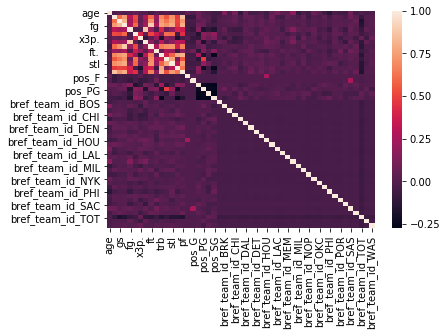

In [20]:
sb.heatmap(x.corr())

In [21]:
cor=x.corr()
cor

,age,g,gs,fg,fg.,x3p,x3p.,x2p.,ft,ft.,...,bref_team_id_ORL,bref_team_id_PHI,bref_team_id_PHO,bref_team_id_POR,bref_team_id_SAC,bref_team_id_SAS,bref_team_id_TOR,bref_team_id_TOT,bref_team_id_UTA,bref_team_id_WAS
age,1.000000,-0.012074,0.025163,-0.009749,0.025226,0.050611,0.013248,0.011609,-0.046554,0.021540,...,-0.056925,-0.133849,-0.027494,-0.047458,-0.053355,0.079234,-0.045491,-0.008947,-0.028057,-0.012182
g,-0.012074,1.000000,0.610951,0.739993,0.319403,0.518074,0.057541,0.278775,0.598333,0.216262,...,0.040394,-0.037436,0.027044,0.019478,-0.017761,0.076977,0.027340,-0.095000,-0.003235,0.013420
gs,0.025163,0.610951,1.000000,0.821619,0.234255,0.501808,0.038062,0.204415,0.707049,0.169176,...,0.012362,-0.014334,0.010668,0.010668,0.013389,0.019200,0.061123,-0.169933,0.000334,0.021287
fg,-0.009749,0.739993,0.821619,1.000000,0.277199,0.597239,0.073361,0.237041,0.893619,0.261657,...,0.019161,-0.015964,0.019425,0.021864,0.011983,0.039674,0.030150,-0.150510,-0.009530,0.026489
fg.,0.025226,0.319403,0.234255,0.277199,1.000000,-0.025529,-0.011844,0.879905,0.217039,-0.014773,...,-0.014305,-0.084604,0.037009,-0.016372,-0.073465,0.056931,0.002455,-0.089705,0.033581,0.006764
x3p,0.050611,0.518074,0.501808,0.597239,-0.025529,1.000000,0.402876,0.041348,0.503353,0.358943,...,0.011111,-0.015575,0.040213,0.041390,-0.021600,0.029557,0.028070,-0.066185,-0.020952,0.020063
x3p.,0.013248,0.057541,0.038062,0.073361,-0.011844,0.402876,1.000000,-0.087895,0.031806,0.191393,...,0.019231,-0.035607,0.026266,-0.061503,0.009657,0.008236,-0.055760,0.058137,-0.064412,0.068547
x2p.,0.011609,0.278775,0.204415,0.237041,0.879905,0.041348,-0.087895,1.000000,0.183288,0.017365,...,-0.022555,-0.052482,0.040710,-0.013195,-0.091657,0.051207,-0.006885,-0.108789,0.051031,-0.006097
ft,-0.046554,0.598333,0.707049,0.893619,0.217039,0.503353,0.031806,0.183288,1.000000,0.259701,...,0.003754,-0.022328,0.017545,0.023205,0.036172,-0.002135,0.062885,-0.125672,-0.012683,-0.007032
ft.,0.021540,0.216262,0.169176,0.261657,-0.014773,0.358943,0.191393,0.017365,0.259701,1.000000,...,-0.002363,-0.061598,-0.022215,0.083249,-0.041747,0.094885,0.047313,-0.071055,-0.026977,0.023001


In [22]:
i=0
for val in cor.columns:
    for x1 in cor.columns:
        if((cor[val].loc[x1]>0.9)&(cor[val].loc[x1]<=0.9999999999)):
            print(val,'and',x1,'has correlation')
            i=1
if(i==0):
    print('There is no correlation greater than 0.9')

There is no correlation greater than 0.9


# Train Test Split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Implementation of KNN Algorithm

In [24]:
knn=KNeighborsRegressor(n_neighbors=5,weights='uniform', algorithm='auto')
knn.fit(x_train,y_train)
pre=knn.predict(x_test)


# Results

In [25]:
print('Train Score',knn.score(x_train,y_train))
print('Test Score',knn.score(x_test,y_test))

Train Score 0.98164521619982
Test Score 0.9801674758173465


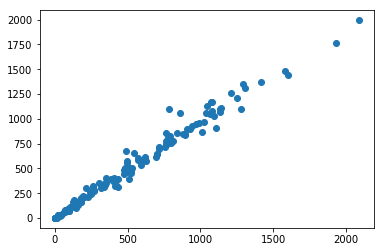

In [26]:
plt.scatter(y_test,pre)
plt.show()

(array([ 1.,  0.,  2.,  0.,  7., 25., 82., 18.,  6.,  4.]),
 array([-319.6 , -267.94, -216.28, -164.62, -112.96,  -61.3 ,   -9.64,
          42.02,   93.68,  145.34,  197.  ]),
 <a list of 10 Patch objects>)

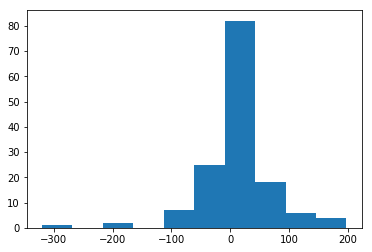

In [27]:
plt.hist(y_test-pre,bins=10)